In [125]:
import numpy as np
import pylab as plt
import pandas as pd
%matplotlib inline

In this assignment we are going to look a bit more at the kiwi measurements dataset.

In [3]:
df = pd.read_excel('PonuiMeasurements.xlsx')
df.head()

,Name,sex,Date,Bill length,Bill length.1,Bill length.2,ts L_1,ts L_2,ts L_3,ts W_1,ts W_2,ts W_3,ts D_1,ts D_2,ts D_3,Body Condition (0-4),Weight
0,Ivan,m,2012-03-18,91.6,NaN,NaN,89.5,NaN,NaN,10.9,NaN,NaN,13.2,NaN,NaN,NaN,1920.0
1,Genesis,m,2012-03-18,92.5,NaN,NaN,88.2,NaN,NaN,13.0,NaN,NaN,15.6,NaN,NaN,NaN,2180.0
2,Dario,m,2012-03-18,89.5,NaN,NaN,87.5,NaN,NaN,12.7,NaN,NaN,14.3,NaN,NaN,NaN,2280.0
3,Ponui,m,2012-03-18,90.6,NaN,NaN,89.6,NaN,NaN,11.3,NaN,NaN,14.8,NaN,NaN,NaN,1995.0
4,Ponui,m,2012-03-18,90.6,NaN,NaN,89.6,NaN,NaN,11.3,NaN,NaN,14.8,NaN,NaN,NaN,1995.0



# Task 1

* Compute the average bill length, tarsus length, width, depth from the 3 measurements of each (1 mark)

In [4]:
df['Bill'] = df[['Bill length', 'Bill length.1', 'Bill length.2']].mean(axis=1).round(1)
df['TLen'] = df[['ts L_1', 'ts L_2', 'ts L_3']].mean(axis=1).round(1)
df['TWid'] = df[['ts W_1', 'ts W_2', 'ts W_3']].mean(axis=1).round(1)
df['TDep'] = df[['ts D_1', 'ts D_2', 'ts D_3']].mean(axis=1).round(1)

* Make a new dataframe that contains only Name, sex, Date, Weight (1 mark)

In [5]:
newdf0 = df[['Name','sex','Date','Weight']]
newdf0

,Name,sex,Date,Weight
0,Ivan,m,2012-03-18,1920.0
1,Genesis,m,2012-03-18,2180.0
2,Dario,m,2012-03-18,2280.0
3,Ponui,m,2012-03-18,1995.0
4,Ponui,m,2012-03-18,1995.0
...,...,...,...,...
768,Lulu,f,2023-04-19,2320.0
769,Linda,f,2023-04-19,2750.0
770,Ken,m,2023-04-19,1880.0
771,Lance,m,2023-04-20,2120.0


* Add the new means into new columns called Bill, TLen, TWid, TDep (1 mark)

In [6]:
newdf = newdf0.join(df[['Bill', 'TLen', 'TWid', 'TDep']])
newdf

,Name,sex,Date,Weight,Bill,TLen,TWid,TDep
0,Ivan,m,2012-03-18,1920.0,91.6,89.5,10.9,13.2
1,Genesis,m,2012-03-18,2180.0,92.5,88.2,13.0,15.6
2,Dario,m,2012-03-18,2280.0,89.5,87.5,12.7,14.3
3,Ponui,m,2012-03-18,1995.0,90.6,89.6,11.3,14.8
4,Ponui,m,2012-03-18,1995.0,90.6,89.6,11.3,14.8
...,...,...,...,...,...,...,...,...
768,Lulu,f,2023-04-19,2320.0,115.2,91.3,13.5,17.4
769,Linda,f,2023-04-19,2750.0,NaN,NaN,NaN,NaN
770,Ken,m,2023-04-19,1880.0,NaN,NaN,NaN,NaN
771,Lance,m,2023-04-20,2120.0,NaN,NaN,NaN,NaN


* Drop any row with NaN in (1 mark)

In [7]:
newdf = newdf.dropna().copy()

In [8]:
newdf.head()

,Name,sex,Date,Weight,Bill,TLen,TWid,TDep
0,Ivan,m,2012-03-18,1920.0,91.6,89.5,10.9,13.2
1,Genesis,m,2012-03-18,2180.0,92.5,88.2,13.0,15.6
2,Dario,m,2012-03-18,2280.0,89.5,87.5,12.7,14.3
3,Ponui,m,2012-03-18,1995.0,90.6,89.6,11.3,14.8
4,Ponui,m,2012-03-18,1995.0,90.6,89.6,11.3,14.8


# Task 2
* The following plot plots the Weight against Bill, TLen,TWidTDep in row 1 then Bill against the remainder in row 2, etc. Males are red and females are blue. 
* Reproduce the plots. I used `pl.subplots` (3 marks)

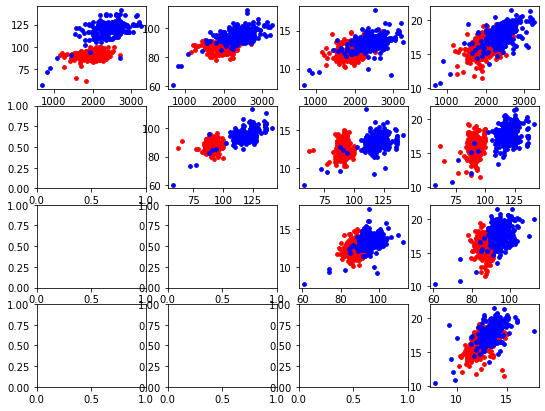

In [79]:
# data has 'm?' and 'unk' included in sex column
#'m?' and 'unk' have been removed 

newdf = newdf[newdf['sex'].isin(['f', 'm'])] # filtering sex column in newdf to only female and male 

colors = {'m': 'red', 'f': 'blue'}

columns = ['Weight','Bill','TLen','TWid','TDep']

fig, axs = plt.subplots(4, 4, figsize = (9, 7))

for c, sex_color in colors.items():
    for d1 in range(4):
        for d2 in range(d1 + 1, 5):
            
            axs[d1, d2 - 1].scatter(
            newdf[newdf['sex'] == c][columns[d1]],
            newdf[newdf['sex'] == c][columns[d2]],
            c = sex_color,
            label = c,
            s = 14, # size of the points
            )
        
plt.show()

# Task 3

* Use my PCA code to perform PCA on the 5D representation you've just plotted (2 marks)

In [35]:
def pca(data):
    # Assumes that data is ordered as rows for datapoints

    # Store the means and subtract them
    means = data.mean(axis=0)
    data = data - means

    # Compute the covariance matrix
    C = np.cov(data.T)

    # Get the eigenvalues and eigenvectors
    evals, evecs = np.linalg.eig(C)

    # Now need to sort them into descending order
    indices = np.argsort(evals)
    indices = indices[::-1]
    evecs = evecs[:, indices]
    evals = evals[indices]

    # Transform the data
    return np.dot(evecs.T, data.T).T, evals, evecs, means

data_for_pca = newdf[columns].values  

# Perform PCA
pca_data, evals, evecs, means = pca(data_for_pca)

* Make the scree plot and decide how many components you should use (2 marks)

**The number of principal components that should be used is 1. The elbow appears to occur at the first principal component but there is another at the second component. The first two principal components explain approximately 99% (0.9999) of variance in the data. This is approximately the same if only PCA1 is used too. The amount of variance explained should be around 70-80%. I suggest that 1 principal component should be used.**

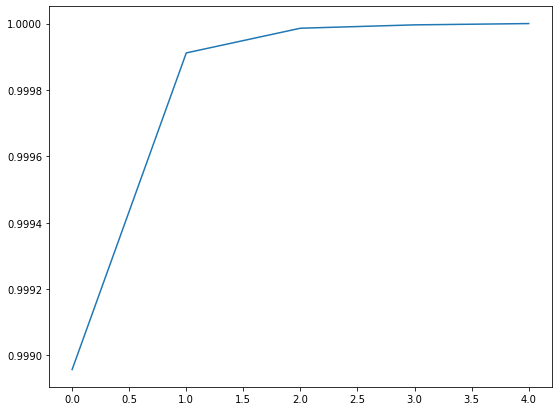

In [215]:
# Scree plot 
plt.figure(figsize=(9, 7))
plt.plot(np.cumsum(evals)[:30]/np.sum(evals));
plt.show()

* Reproduce the same plots you just made with the PCA data (1 mark)

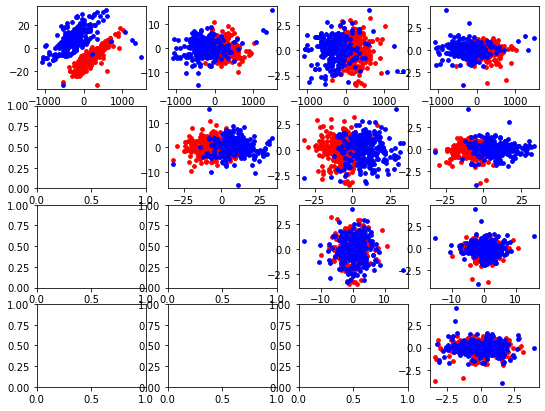

In [80]:
fig, axs = plt.subplots(4, 4, figsize=(9, 7))

for c, sex_color in colors.items():
    for d1 in range(4):
        for d2 in range(d1 + 1, 5):
            axs[d1, d2 - 1].scatter(
                pca_data[newdf['sex'] == c, d1],  # Selecting the PCA component for the d1 dimension
                pca_data[newdf['sex'] == c, d2],  # Selecting the PCA component for the d2 dimension
                c = sex_color,
                label = c,
                s = 14,
            )

plt.show()

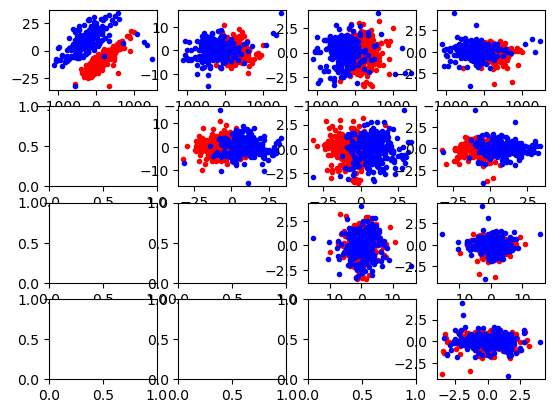

In [117]:
# example subplots for PCA data

* Explain why the overlaps are so high for the last couple of components (1 mark)

**Dimensions in later principle components may capture less of the overall variance in data. These dimensions may be less related to the primary differences between male and females data points, causing them to overlap in the PCA data but not in the original data. This means that non-linear relationships may exist bettween some features which are captured in the last few components, seen in the subplots. Since eigenvalues, eigenvectors and the covariance between relationships work best with linear relationships, PCA is not as effective in getting the data into a lower-dimensional space and maximising variance. In a reduced format, there are high overlaps for female and male bird measurements.**

# Task 4
Those measurements that look particularly wrong are actually chicks. We are going to look at two of them: `Charlie` and `Jackie (Marcus Aurelius)`

* Extract just those two birds and store them in a new dataset each (1 mark)

In [108]:
charlie = newdf[newdf['Name'] == 'Charlie'] # using the newdf as it doesn't have NA values 
jackie = newdf[newdf['Name'] == 'Jackie (Marcus Aurelius)']

* Plot their weight and (separately) bill length against time (year) (1 mark)

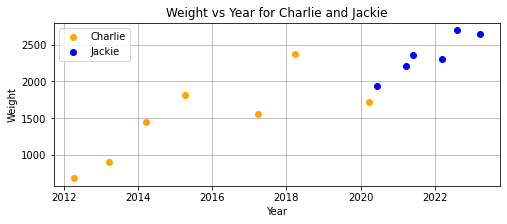

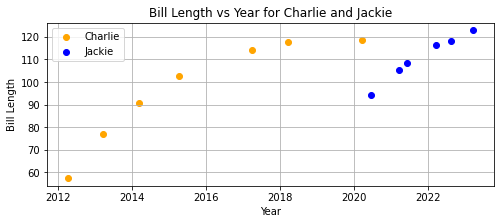

In [109]:
# Plot Weight against Year for Charlie and Jackie
plt.figure(figsize=(8, 3))
plt.scatter(charlie['Date'], charlie['Weight'], color='orange',label='Charlie')
plt.scatter(jackie['Date'], jackie['Weight'], color='blue',label = 'Jackie')
plt.xlabel('Year')
plt.ylabel('Weight')
plt.title('Weight vs Year for Charlie and Jackie')
plt.legend()
plt.grid(True)
plt.show()

# Plot Bill Length against Year for Charlie and Jackie
plt.figure(figsize=(8, 3))
plt.scatter(charlie['Date'], charlie['Bill'], color='orange', label = 'Charlie')
plt.scatter(jackie['Date'], jackie['Bill'], color='blue',label = 'Jackie')
plt.xlabel('Year')
plt.ylabel('Bill Length')
plt.title('Bill Length vs Year for Charlie and Jackie')
plt.legend()
plt.grid(True)
plt.show()

* Charlie was a freshly hatched egg, but Jackie was caught as a juvenile. Estimate Jackie's age when we first caught her. Explain your answer. (1 mark)

**Charlie was a freshly hatched egg and her measurements of weight and bill length were first taken in 2012 (assuming her measurements were taken when she was first hatched). Jackie was first caught in 2020. Charlies weight in 2015 is similar to Jackies weight in 2020 when she was caught. Additionally, Charlies bill length in 2014 is similar to Jackies bill length in 2020. Therefore, I would estimate Jackies age to have been around 2-3 years old when she was first caught based off of Charlies measurements.**

* Assuming that Charlie's first weight is age 0, use that number to estimate the age at each measurement, and plot both bill length and weight against estimated age for both birds (2 marks) I used `from datetime import timedelta`

In [110]:
from datetime import datetime, timedelta

charlie = charlie.copy()
charlie['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")

start_date = datetime(2012, 4, 9)
charlie['Age(days)'] = (df['Date'] - start_date).dt.days
charlie

,Name,sex,Date,Weight,Bill,TLen,TWid,TDep,Age(days)
44,Charlie,f,2012-04-09,678.0,57.3,60.6,7.8,10.4,0
80,Charlie,f,2013-03-19,900.0,76.8,74.2,9.4,14.0,344
124,Charlie,f,2014-03-18,1450.0,90.8,84.2,12.4,16.6,708
193,Charlie,f,2015-04-11,1810.0,102.5,89.7,12.7,18.1,1097
287,Charlie,f,2017-03-30,1550.0,114.4,92.2,13.7,19.4,1816
334,Charlie,f,2018-03-25,2380.0,117.9,96.9,13.2,19.0,2176
420,Charlie,f,2020-03-21,1725.0,118.5,95.2,12.0,15.6,2903


In [117]:
charlie_first_age = charlie['Age(days)'].iloc[0]
jackie = jackie.copy()
jackie['Age(days)'] = 730 + (jackie['Date'] - jackie['Date'].iloc[0]).dt.days
# estimating that jackie was 730 days old (2 years) when she was first measured

jackie

,Name,sex,Date,Weight,Bill,TLen,TWid,TDep,Age(days)
500,Jackie (Marcus Aurelius),f,2020-06-10,1940.0,94.3,84.9,11.9,15.3,730
558,Jackie (Marcus Aurelius),f,2021-03-20,2210.0,105.5,97.2,13.6,18.3,1013
608,Jackie (Marcus Aurelius),f,2021-06-05,2360.0,108.3,96.8,13.5,18.4,1090
634,Jackie (Marcus Aurelius),f,2022-03-16,2300.0,116.2,93.4,14.6,17.5,1374
706,Jackie (Marcus Aurelius),f,2022-08-11,2700.0,118.2,93.2,13.0,17.2,1522
756,Jackie (Marcus Aurelius),f,2023-03-21,2650.0,123.0,99.2,13.8,19.2,1744


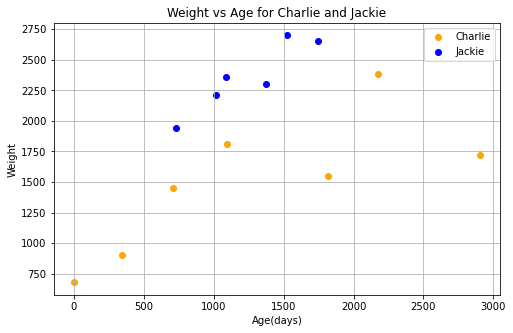

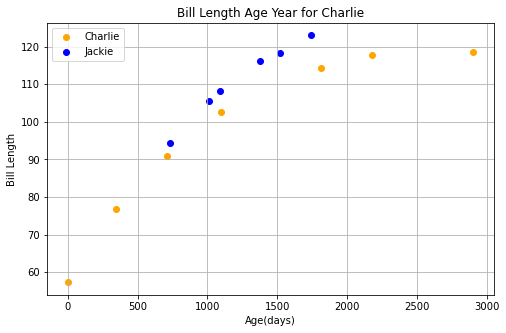

In [122]:
# Plot both bill length and weight against estimated age for both birds

# Plot Weight against Age(years) for Charlie and Jackie
plt.figure(figsize=(8, 5))
plt.scatter(charlie['Age(days)'], charlie['Weight'], color='orange',label='Charlie')
plt.scatter(jackie['Age(days)'], jackie['Weight'], color='blue',label = 'Jackie')
plt.xlabel('Age(days)')
plt.ylabel('Weight')
plt.title('Weight vs Age for Charlie and Jackie')
plt.legend()
plt.grid(True)
plt.show()

# Plot Bill Length against Age(years) for Charlie and Jackie
plt.figure(figsize=(8, 5))
plt.scatter(charlie['Age(days)'], charlie['Bill'], color='orange', label='Charlie')
plt.scatter(jackie['Age(days)'], jackie['Bill'], color='blue',label = 'Jackie')
plt.xlabel('Age(days)')
plt.ylabel('Bill Length')
plt.title('Bill Length Age Year for Charlie')
plt.legend()
plt.grid(True)
plt.show()

* Fit a regression line to the two measurements (bill length and weight) (use the code we used in the first lecture). That code allows you to fit higher-order functions (it's the 1 at the end). What order looks best for the two birds? (2 marks)

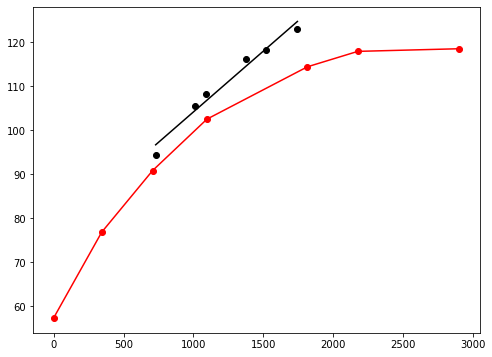

In [214]:
x1 = charlie['Age(days)']
y1 = charlie['Bill']

x2 = jackie['Age(days)']
y2 = jackie['Bill']

pf1 = np.polyfit(x1, y1, 1)  
f1 = np.poly1d(pf1)

pf2 = np.polyfit(x2, y2, 2) 
f2 = np.poly1d(pf2)

plt.figure(figsize=(8, 6))

plt.scatter(x1, y1, label='Charlie', color='red')
plt.plot(x1, y1, label='Charlie', color='red')

plt.scatter(x2, y2, label='Jackie', color='black')
plt.plot(x_range2, y_range2, label='Jackie', color='black') # did range so the points don't connect

plt.show()

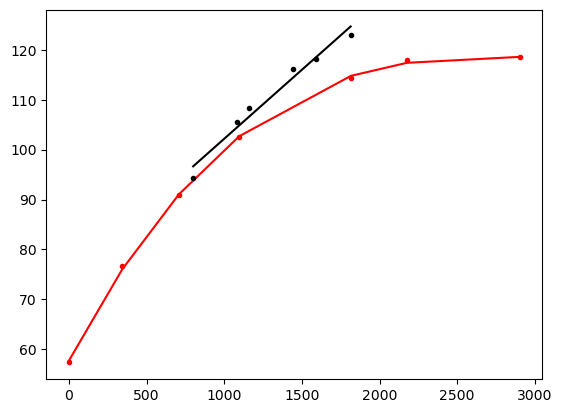

In [106]:
# example plot

* What order looks best for the two birds?

**Using order 1 for Charlie works best because there seems to be a linear relationship between bill length and age (days). The data points for Charlie seem to follow a straight line. Using order 2 works best for Jackie because there seems to be a quadratic relationship between bill length and age (days). The data points for Jackie follow an upwards curve.** 